In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_columns',200)

In [2]:
df = pd.read_csv('listings_new.csv')

In [3]:
df.head()

,Unnamed: 0,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price
0,0,3,95.0,0.0,47.0,47.0,5.0,1.0,1.0,1.0,1,0,6.0,2,2,4,4,18.0,130.0,150.000000,42.000000,2.0,25.0,3.0,730.0,3.0,3.0,730.0,730.0,3.0,730.0,0.0,0.0,0.0,251.0,1.0,0.0,80.0,10.0,10.0,2.0,10.0,10.0,8.0,0.0,0,0.0,0.0,31.0,31.0,0.0,0.0,0.02,4.867534
1,1,3,95.0,0.0,47.0,47.0,5.0,1.0,1.0,1.0,1,0,8.0,4,3,6,4,22.0,60.0,150.000000,50.000000,2.0,30.0,1.0,1125.0,1.0,5.0,1125.0,1125.0,1.9,1125.0,13.0,31.0,43.0,52.0,16.0,11.0,85.0,9.0,9.0,9.0,10.0,9.0,8.0,1.0,3,0.0,0.0,31.0,31.0,0.0,0.0,0.21,4.094345
2,2,2,100.0,0.0,2.0,2.0,6.0,1.0,1.0,1.0,1,2,2.0,2,1,1,4,41.0,33.0,100.000000,89.922336,1.0,10.0,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.1,1125.0,3.0,3.0,3.0,3.0,125.0,31.0,90.0,10.0,9.0,10.0,10.0,9.0,9.0,0.0,1,0.0,0.0,2.0,0.0,2.0,0.0,3.05,3.496508
3,3,3,100.0,1.0,5.0,5.0,8.0,1.0,1.0,0.0,1,0,6.0,4,3,5,4,46.0,210.0,300.000000,80.000000,3.0,10.0,3.0,1125.0,3.0,5.0,1125.0,1125.0,3.1,1125.0,10.0,33.0,56.0,326.0,49.0,17.0,94.0,10.0,10.0,10.0,10.0,9.0,9.0,1.0,3,0.0,1.0,2.0,2.0,0.0,0.0,0.47,5.347108
4,4,3,100.0,1.0,1.0,1.0,8.0,1.0,1.0,1.0,1,2,2.0,2,1,1,4,17.0,45.0,991.363756,-10.009156,1.0,25.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,10.0,31.0,41.0,77.0,254.0,48.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,3,1.0,1.0,1.0,0.0,1.0,0.0,2.29,3.806662


In [4]:
df.drop('Unnamed: 0',1,inplace = True)

In [5]:
df.drop('host_listings_count',1,inplace = True)

In [6]:
ds = pd.read_csv('senti_analysis.csv')


In [7]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# for i in df.select_dtypes('object').columns:
#     df[i] = le.fit_transform(df[i])

In [8]:
rounding_categorical = ['bathrooms','beds','bedrooms']

In [9]:
df[rounding_categorical] = df[rounding_categorical].astype(int)
df[rounding_categorical]

,bathrooms,beds,bedrooms
0,2,4,2
1,4,6,3
2,2,1,1
3,4,5,3
4,2,1,1
...,...,...,...
20355,2,1,1
20356,2,1,1
20357,4,1,1
20358,2,1,1


In [10]:
for i in df.select_dtypes('bool').columns:
    df[i] = df[i].astype(int)

In [11]:
df['log_price'] = np.log(df.price)

In [12]:
daf = df.drop('price',1)

In [13]:
daf.shape

(20360, 51)

In [14]:
X,y = daf.drop('log_price',1), daf.log_price

In [15]:
import statsmodels.api as sm

In [16]:
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     333.7
Date:                Mon, 18 Nov 2019   Prob (F-statistic):               0.00
Time:                        19:47:23   Log-Likelihood:                -19678.
No. Observations:               20360   AIC:                         3.946e+04
Df Residuals:                   20309   BIC:                         3.986e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                            3.1529      0.197     15.998      0.000       2.767       3.539
host_response_time                              -0.0009      0.006     -0.143      0.886      -0.014       0.012
host_response_rate                               0.0006      0.000      1.811      0.070   -4.86e-05       0.001
host_is_superhost                                0.0137      0.012      1.139      0.255      -0.010       0.037
host_total_listings_count                       -0.0013      0.000     -8.875      0.000      -0.002      -0.001
host_verifications                              -0.0225      0.002    -10.394      0.000      -0.027      -0.018
host_has_profile_pic                            -0.0143      0.099     -0.145      0.884      -0.208       0.179
host_identity_verified                           0.0014      0.010      0.142      0.887      -0.018       0.021
is_location_exact                                0.0083      0.010      0.860      0.390      -0.011       0.027
property_type                                    0.0008      0.001      1.102      0.270      -0.001       0.002
room_type                                       -0.0067      0.006     -1.198      0.231      -0.018       0.004
accommodates                                     0.1728      0.003     55.983      0.000       0.167       0.179
bathrooms                                       -0.0023      0.004     -0.548      0.584      -0.011       0.006
bedrooms                                         0.0019      0.008      0.237      0.813      -0.014       0.017
beds                                            -0.0027      0.004     -0.622      0.534      -0.011       0.006
bed_type                                        -0.0272      0.038     -0.711      0.477      -0.102       0.048
amenities                                        0.0024      0.000      5.291      0.000       0.002       0.003
security_deposit                              4.401e-05   1.17e-05      3.762      0.000    2.11e-05    6.69e-05
cleaning_fee                                     0.0012      0.000      8.003      0.000       0.001       0.001
guests_included                                  0.0370      0.004      9.357      0.000       0.029       0.045
extra_people                                     0.0020      0.000      6.316      0.000       0.001       0.003
minimum_nights                                   0.0006      0.001      0.447      0.655      -0.002       0.003
maximum_nights                                   0.0002   4.46e-05      4.881      0.000       0.000       0.000
minimum_minimum_nights                          -0.0076      0.002     -4.994      0.000      -0.011      -0.005
maximum_minimum_nights          

In [18]:
# model.summary2()

In [19]:
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score


In [20]:
def MLmodel(model,Xtrain,Xtest, ytrain,ytest ):
    model.fit(Xtrain,ytrain)
    pred = model.predict(Xtest)
    train = model.score(Xtrain,ytrain)
    test = model.score(Xtest,ytest)
    
#     scores = cross_val_score(model,X,y,cv = 5)
#     print('cross validation mean score', scores.mean())
    print('train score',train)
    print('test score',test)
    print('MSE', mean_squared_error(ytest,pred))
    print('RMSE',np.sqrt(mean_squared_error(ytest,pred)))
    print('MAE', mean_absolute_error(ytest,pred))

In [21]:
lr = LinearRegression()

In [22]:
scores = cross_val_score(lr,X,y,cv = 5)
print('cross validation mean score', scores.mean())

cross validation mean score -6529.309504231478


In [23]:

X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [24]:
lr = LinearRegression()

MLmodel(lr,X_train, X_test, y_train,y_test)

train score 0.4521246618699525
test score 0.44329336870346703
MSE 0.4050325376935213
RMSE 0.6364216665808301
MAE 0.43804203283086024


In [25]:
dt = DecisionTreeRegressor(max_depth= 3)

MLmodel(dt,X_train, X_test, y_train,y_test)

train score 0.43996227591863957
test score 0.43102063806804114
MSE 0.4139615767138017
RMSE 0.6433984587437257
MAE 0.4321209359324506


In [26]:
rf = RandomForestRegressor(n_estimators= 5)

MLmodel(rf,X_train,X_test,y_train,y_test)

train score 0.9237268715296377
test score 0.6237549205360616
MSE 0.273737532055384
RMSE 0.523199323446986
MAE 0.34446720054006374


In [27]:
knn = KNeighborsRegressor(n_neighbors= 2)

MLmodel(knn,X_train,X_test,y_train,y_test)

train score 0.7875424595186846
test score 0.31886241726982456
MSE 0.4955624167959357
RMSE 0.703961942718451
MAE 0.47644182429660037


In [28]:
nb = GaussianNB()

# MLmodel(nb,X_train,X_test,y_train,y_test)


In [29]:
from sklearn.linear_model import Ridge,Lasso


In [30]:
params = {'alpha': np.linspace(0.001,5,20)}

ri = Ridge()

gs_ridge = GridSearchCV(ri,params,cv = 5)

gs_ridge.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': array([1.00000000e-03, 2.64105263e-01, 5.27210526e-01, 7.90315789e-01,
       1.05342105e+00, 1.31652632e+00, 1.57963158e+00, 1.84273684e+00,
       2.10584211e+00, 2.36894737e+00, 2.63205263e+00, 2.89515789e+00,
       3.15826316e+00, 3.42136842e+00, 3.68447368e+00, 3.94757895e+00,
       4.21068421e+00, 4.47378947e+00, 4.73689474e+00, 5.00000000e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [31]:
gs_ridge.best_estimator_

Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [32]:
ridge = Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=0, solver='auto', tol=0.001)

MLmodel(ridge,X_train,X_test,y_train,y_test)

train score 0.4521236883611505
test score 0.44333825517493775
MSE 0.40499988049056046
RMSE 0.6363960091724024
MAE 0.43802333115117525


In [33]:
# params = {'alpha': [0.00001,0.0001,0.001,0.01,0.1,0.5]}

# la = Lasso()

# gs_lasso = GridSearchCV(la,params,cv = 5)

# gs_lasso.fit(X,y)

In [34]:
# gs_lasso.best_estimator_

In [35]:
# lasso = 

# MLmodel(lasso,X_train,X_test,y_train,y_test)

In [36]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 53.205983
Best score using built-in LassoCV: 0.000008


In [37]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 2 variables and eliminated the other 48 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

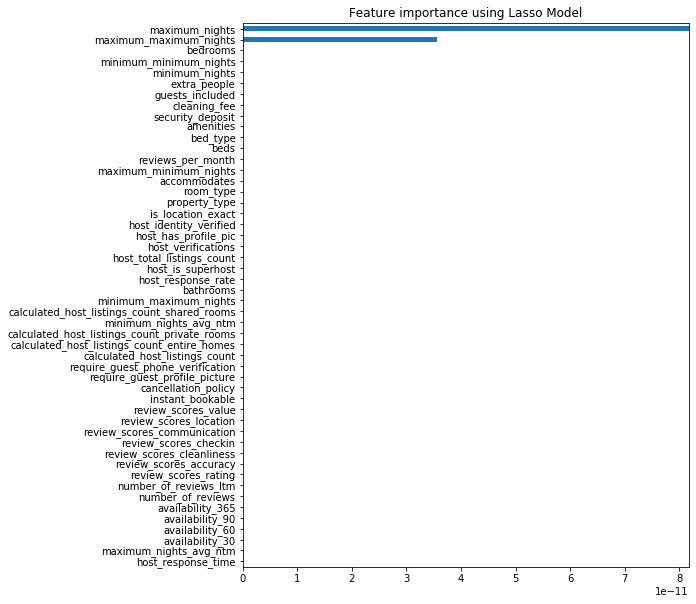

In [38]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")


In [39]:
import xgboost
from sklearn.metrics import explained_variance_score

In [40]:
xgb = xgboost.XGBRegressor(n_estimators=250, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=5)

In [41]:
xgb.fit(X_train,y_train)

[19:47:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.08, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=250,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.75, verbosity=1)

In [42]:
predictions = xgb.predict(X_test)
print(explained_variance_score(y_test,predictions))

0.7166998567842668


In [43]:
MLmodel(xgb,X_train,X_test,y_train,y_test)   # it got less accuracy

[19:47:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train score 0.841473813137161
test score 0.7166935980617501
MSE 0.20611989236526393
RMSE 0.45400428672564747
MAE 0.31297360335207763


In [44]:
accuracy = explained_variance_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.67%


In [45]:
from sklearn.ensemble import AdaBoostRegressor

In [46]:
ada_clf=AdaBoostRegressor(dt , learning_rate=0.08, loss='linear',
        n_estimators=20, random_state=0)
ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.08, loss='linear', n_estimators=20,
                  random_

In [47]:
ada_clf.score(X_test, y_test)

0.4364604740098087

In [48]:
ada_clf.score(X_train, y_train)

0.4515040602682516

##### Ridge alpha fixing:

In [49]:
alphas = [0.001, 0.01, 0.1, 1,2,3, 5,9,15,30,100 ]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
    ridge.fit(X_train, y_train)
    # calculate errors
    new_train_error = mean_squared_error(y_train, ridge.predict(X_train))
#     new_validation_error = mean_squared_error(y_validation, ridge.predict(X_validation))
    new_test_error = mean_squared_error(y_test, ridge.predict(X_test))
    rmse_new = np.sqrt(new_test_error)
    # print errors as report
    print('alpha: {:7} | train error: {:5} | test error: {:7} | rmse : {}'.
          format(alpha,
                 round(new_train_error,3),
#                  round(new_validation_error,3),
                 round(new_test_error,3),
           round(rmse_new,3))
         )

All errors are RMSE
----------------------------------------------------------------------------
alpha:   0.001 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:    0.01 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:     0.1 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:       1 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:       2 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:       3 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:       5 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:       9 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:      15 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:      30 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:     100 | train error: 0.406 | test error:   0.405 | rmse : 0.636


In [50]:
# from sklearn.metrics 

# instantiate model
ridge = Ridge(alpha=0.1, fit_intercept=True, random_state=99)

# fit and calculate errors
MLmodel(ridge,X_train,X_test,y_train,y_test)

train score 0.4521246605865711
test score 0.4432928749069531
MSE 0.40503289695573214
RMSE 0.6364219488324803
MAE 0.438041466250019


In [51]:
alphas = [0.00001,0.0001,0.001, 0.01, 0.1, 1,2,3, 5,9,15,30,100 ]
print('All errors are RMSE')
print('-'*76)
for alpha in alphas:
    # instantiate and fit model
    las = Lasso(alpha=alpha, fit_intercept=True, random_state=99)
    las.fit(X_train, y_train)
    # calculate errors
    new_train_error = mean_squared_error(y_train, ridge.predict(X_train))
#     new_validation_error = mean_squared_error(y_validation, ridge.predict(X_validation))
    new_test_error = mean_squared_error(y_test, ridge.predict(X_test))
    rmse_new = np.sqrt(new_test_error)
    # print errors as report
    print('alpha: {:7} | train error: {:5} | test error: {:7} | rmse : {}'.
          format(alpha,
                 round(new_train_error,3),
#                  round(new_validation_error,3),
                 round(new_test_error,3),
           round(rmse_new,3))
         )

All errors are RMSE
----------------------------------------------------------------------------
alpha:   1e-05 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:  0.0001 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:   0.001 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:    0.01 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:     0.1 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:       1 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:       2 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:       3 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:       5 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:       9 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:      15 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:      30 | train error: 0.406 | test error:   0.405 | rmse : 0.636
alpha:     100 | train erro

In [52]:
# print('ORIGINAL ERROR')
# print('-' * 40)
# print('train error: {} | test error: {}\n'.format(train_error, test_error))
# print('ERROR w/REGULARIZATION')
# print('-' * 40)
# print('train error: {} | test error: {}'.format(new_train_error, new_test_error))

In [53]:
ds.columns

Index(['Unnamed: 0', 'listing_id', 'sentiment_polarity', 'sentiment_sub'], dtype='object')

In [54]:
ds.drop(['comments','len', 'token'],1,inplace = True)

KeyError: "['comments' 'len' 'token'] not found in axis"

In [ ]:
ds.rename(columns = {'sentiment':'sentiment_polarity'}, inplace = True)

In [ ]:
ds.to_csv('senti_analysis.csv')

In [ ]:
das = pd.read_csv('listings_new_senti.csv')

In [ ]:
das.listing_id

In [ ]:
main = pd.concat([das.listing_id,df],1)

In [ ]:
main.listing_id = main.listing_id.astype(int)

In [ ]:
sen = pd.merge(main,ds,'inner','listing_id')

In [ ]:
sen.head()

In [ ]:
sen.to_csv('final_sentiment_csv.csv')

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
grad = GradientBoostingRegressor(learning_rate=0.08)
grad.fit(X_train,y_train)
print(grad.score(X_train,y_train))
print(grad.score(X_test,y_test))

0.6446339199564817
0.6129944553364592


In [64]:
from sklearn.ensemble import GradientBoostingRegressor,VotingRegressor
est = [('Gradboos', grad), ('xgb', xgb)]
# weight = 

vr = VotingRegressor(est)
vr.fit(X_train,y_train)
print(vr.score(X_train,y_train))
print(vr.score(X_test,y_test))

[23:40:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.7690449425732677
0.6828719487824781


In [65]:
MLmodel(vr,X_train,X_test,y_train,y_test)

[23:44:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
train score 0.7690449425732678
test score 0.6829134878008079
MSE 0.2306966496973831
RMSE 0.48030891069954457
MAE 0.3292274544763853


##### Polynomial features`

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
for i in [2,3,4,5]:
    print(i)
    polynomial_features= PolynomialFeatures(degree= i )
    x_poly = polynomial_features.fit_transform(X)
    X_train_poly, X_test_Poly, y_train_poly, y_test_poly = train_test_split(x_poly, y, test_size = 0.3, random_state = 0 )
    print(MLmodel(rf,X_train_poly, X_test_Poly, y_train_poly, y_test_poly ))

2
train score 0.9177686366078124
test score 0.6059043877398644
MSE 0.2867247073307833
RMSE 0.5354668125390997
MAE 0.3644329034675459
None
3
